<a href="https://colab.research.google.com/github/pk18singh/Flat_Prediction_Model/blob/main/missing_value_imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('properties_outlier_treated.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,house,independent,sector 81,0.89,8128.0,1095.0,Built Up area: 1095 (101.73 sq.m.),1.0,1.0,0,1.0,NaN,Undefined,NaN,1095.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1095.000000
1,flat,central park flower valley,sector 33,1.35,10385.0,1300.0,Carpet area: 1300 (120.77 sq.m.),3.0,2.0,2,3.0,West,New Property,NaN,NaN,1300.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,433.333333
2,flat,guru gram haryana cghs,sector 56,1.39,8424.0,1650.0,Super Built up area 1850(171.87 sq.m.)Built Up...,3.0,2.0,3,6.0,South,Old Property,1850.0,1750.0,1650.0,0.0,1.0,0.0,1.0,0.0,2.0,89.0,550.000000
3,flat,emaar mgf emerald floors premier,sector 65,3.00,15190.0,1975.0,Super Built up area 1975(183.48 sq.m.),4.0,4.0,3+,2.0,South-East,Relatively New,1975.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,87.0,493.750000
4,house,independent,manesar,2.00,14959.0,1337.0,Plot area 1337.4(124.25 sq.m.),3.0,1.0,0,3.0,North,Moderately Old,NaN,1337.4,NaN,0.0,0.0,0.0,0.0,0.0,0.0,16.0,445.666667


In [5]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1968
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

**Built up area**

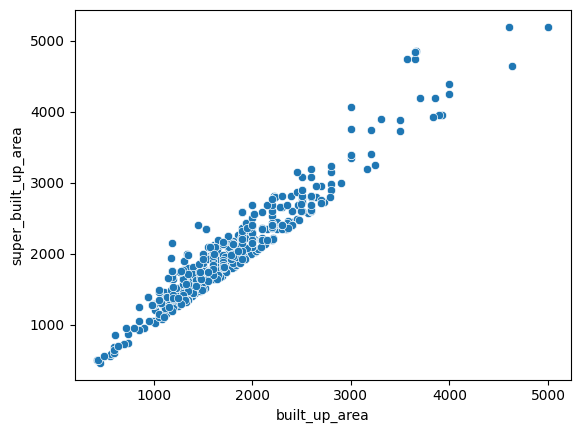

In [8]:
sns.scatterplot(x=df['built_up_area'], y=df['super_built_up_area'])
plt.show()

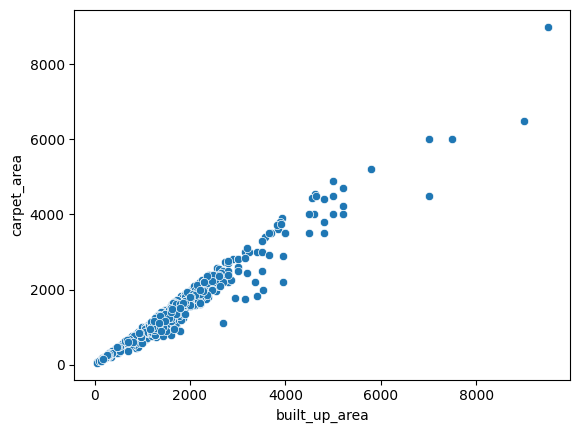

In [9]:
sns.scatterplot(x = df['built_up_area'], y = df['carpet_area'])
plt.show()

In [10]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3550    False
3551    False
3552    False
3553    False
3554    False
Length: 3555, dtype: bool

In [11]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [12]:
all_present_df.shape

(531, 24)

In [13]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [14]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [15]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [16]:
# both present but built up is null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [17]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
5,flat,tata primanti,sector 72,3.90,13425.0,2905.0,Super Built up area 2905(269.88 sq.m.)Carpet a...,4.0,4.0,3+,39.0,East,Relatively New,2905.0,NaN,2150.0,0.0,1.0,0.0,0.0,1.0,0.0,49.0,726.250000
14,flat,puri emerald bay,sector 104,2.23,9911.0,2250.0,Super Built up area 2450(227.61 sq.m.)Carpet a...,3.0,4.0,3+,10.0,East,Relatively New,2450.0,NaN,2250.0,0.0,1.0,0.0,0.0,0.0,2.0,159.0,750.000000
15,flat,supertech araville,sector 79,0.71,6063.0,1171.0,Super Built up area 1295(120.31 sq.m.)Carpet a...,2.0,2.0,3+,17.0,North,New Property,1295.0,NaN,1250.0,0.0,0.0,0.0,0.0,1.0,0.0,53.0,585.500000
24,flat,ramson kshitij sec-95 gurugram,sector 95,0.27,2700.0,1000.0,Super Built up area 1000(92.9 sq.m.)Carpet are...,2.0,2.0,0,1.0,West,Undefined,1000.0,NaN,550.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500.000000
30,flat,bestech park view ananda,sector 81,1.35,7542.0,1790.0,Super Built up area 1790(166.3 sq.m.)Carpet ar...,3.0,3.0,3+,10.0,North-East,Moderately Old,1790.0,NaN,1130.0,0.0,0.0,1.0,0.0,0.0,2.0,72.0,596.666667


In [18]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

<ipython-input-18-a2fefc960aa3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)


In [19]:
df.update(sbc_df)

In [20]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1547
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [21]:
# super built up is present but  carpet area is null built up area is  null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [23]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

<ipython-input-23-554030e2e595>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [24]:
df.update(sb_df)

In [25]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area           672
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [26]:
# super built up area and built up area are null but carpet area is present
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [27]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

<ipython-input-27-747bc7ee3c0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [28]:
df.update(c_df)

In [29]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area             0
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

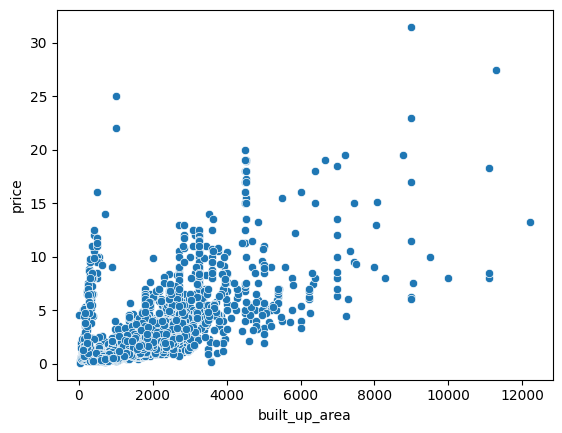

In [31]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])
plt.show()

In [32]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [33]:
anamoly_df.sample(5)

,price,area,built_up_area
870,2.55,1860.0,1600.0
298,5.25,1350.0,160.0
1795,3.00,1557.0,1557.0
2224,3.95,2343.0,1900.0
508,11.00,2700.0,361.0


In [34]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [35]:
df.update(anamoly_df)

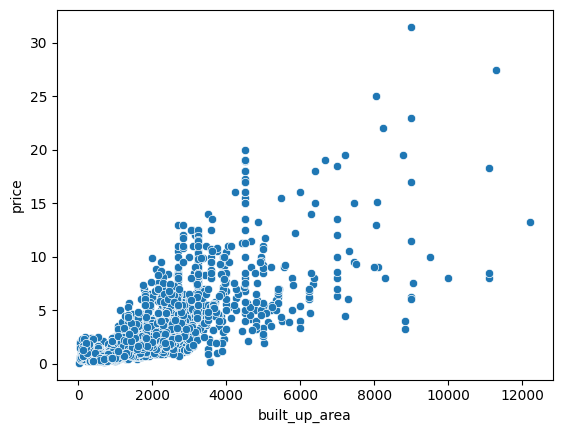

In [36]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])
plt.show()

In [37]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [38]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 81,0.89,8128.0,1.0,1.0,0,1.0,NaN,Undefined,1095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,flat,central park flower valley,sector 33,1.35,10385.0,3.0,2.0,2,3.0,West,New Property,1444.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0
2,flat,guru gram haryana cghs,sector 56,1.39,8424.0,3.0,2.0,3,6.0,South,Old Property,1750.0,0.0,1.0,0.0,1.0,0.0,2.0,89.0
3,flat,emaar mgf emerald floors premier,sector 65,3.00,15190.0,4.0,4.0,3+,2.0,South-East,Relatively New,1975.0,0.0,1.0,0.0,0.0,0.0,0.0,87.0
4,house,independent,manesar,2.00,14959.0,3.0,1.0,0,3.0,North,Moderately Old,1337.4,0.0,0.0,0.0,0.0,0.0,0.0,16.0


In [39]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

**FloorNum**

In [40]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
71,house,independent,sector 4,4.12,8889.0,2.0,1.0,3+,NaN,NaN,Moderately Old,4635.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
518,house,independent,sector 26,4.60,12198.0,4.0,4.0,3+,NaN,NaN,Old Property,3771.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
781,house,ansal sushant lok plots,sector 43,3.30,26570.0,1.0,1.0,0,NaN,NaN,Under Construction,1242.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
802,house,independent,sector 2,5.60,17284.0,8.0,6.0,3+,NaN,South-West,Moderately Old,3240.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
848,house,emaar mgf marbella,sector 66,9.00,21251.0,4.0,4.0,3+,NaN,South-West,Relatively New,5200.0,0.0,1.0,1.0,1.0,0.0,2.0,114.0
1372,house,independent,sector 7,6.50,15046.0,3.0,2.0,3+,NaN,NaN,Old Property,4320.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
1397,flat,NaN,sector 78,0.60,3692.0,2.0,2.0,0,NaN,NaN,Under Construction,1625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1970,house,independent,sector 4,0.65,11111.0,4.0,2.0,2,NaN,NaN,Moderately Old,585.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2100,house,dlf new town heights,sector 86,2.47,7719.0,4.0,4.0,3+,NaN,West,Moderately Old,2800.0,0.0,1.0,0.0,1.0,0.0,2.0,130.0
2420,house,ansal sushant lok,sector 43,10.50,27911.0,4.0,4.0,2,NaN,North-East,Old Property,3762.0,0.0,1.0,0.0,0.0,0.0,0.0,59.0


In [43]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [44]:
df['floorNum'].fillna(2.0, inplace=True)

In [45]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

**Facing**

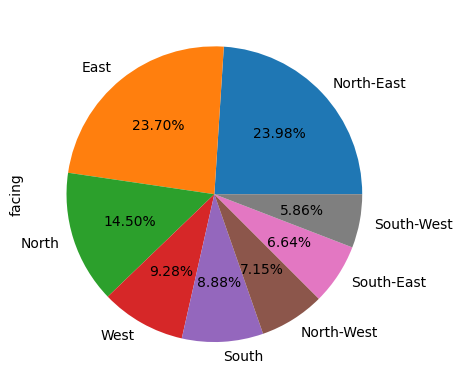

In [49]:
df['facing'].value_counts().plot(kind='pie', autopct='%0.2f%%')
plt.show()

In [50]:
df.drop(columns=['facing'],inplace=True)

In [51]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2852,flat,m3m woodshire,sector 107,1.01,7394.0,2.0,2.0,3+,11.0,New Property,1200.0,0.0,0.0,0.0,0.0,1.0,0.0,74.0
1881,flat,satya the hermitage,sector 103,1.12,5625.0,3.0,4.0,3+,9.0,New Property,1734.0,0.0,1.0,0.0,0.0,0.0,0.0,49.0
861,flat,ambience creacions,sector 22,4.10,28101.0,3.0,3.0,3+,2.0,New Property,2069.0,0.0,0.0,0.0,0.0,0.0,1.0,119.0
2673,flat,indiabulls enigma,sector 110,4.49,11572.0,5.0,5.0,3+,4.0,Relatively New,3511.0,0.0,1.0,0.0,0.0,0.0,0.0,165.0
128,flat,orris aster court premier,sector 85,1.25,5896.0,3.0,4.0,2,5.0,Relatively New,1900.0,0.0,1.0,0.0,0.0,0.0,2.0,174.0


In [53]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [54]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1397,flat,NaN,sector 78,0.6,3692.0,2.0,2.0,0,2.0,Under Construction,1625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
df.drop(index=[1397],inplace=True)

In [56]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

**AgePossession**      

In [57]:
df['agePossession'].value_counts()

Relatively New        1605
New Property           557
Moderately Old         545
Undefined              431
Old Property           293
Under Construction     123
Name: agePossession, dtype: int64

In [62]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 81,0.89,8128.0,1.0,1.0,0,1.0,Undefined,1095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,house,sare crescent parc royal greens phase 1,sector 92,0.85,4877.0,4.0,4.0,3,4.0,Undefined,1743.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,flat,godrej nature plus,sector 33,1.65,8267.0,3.0,3.0,3,2.0,Undefined,2218.0,0.0,1.0,0.0,0.0,0.0,0.0,37.0
21,flat,signature global orchard avenue,sector 93,0.40,5479.0,2.0,2.0,0,0.0,Undefined,730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,flat,ramson kshitij sec-95 gurugram,sector 95,0.27,2700.0,2.0,2.0,0,1.0,Undefined,758.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3528,flat,godrej nature plus,sector 33,1.67,10503.0,3.0,2.0,2,18.0,Undefined,1857.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0
3534,flat,belgravia resort residences,sector 48,3.45,18459.0,3.0,3.0,3,14.0,Undefined,1869.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3535,flat,the roselia 2,sector 95,0.45,6475.0,2.0,2.0,2,19.0,Undefined,695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3541,flat,central park flower valley,sector 33,3.30,13750.0,3.0,3.0,3,2.0,Undefined,2667.0,1.0,1.0,1.0,1.0,0.0,0.0,61.0


In [66]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [67]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [68]:
df['agePossession'].value_counts()

Relatively New        1782
New Property           635
Moderately Old         586
Old Property           331
Under Construction     125
Undefined               95
Name: agePossession, dtype: int64

In [69]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [70]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [71]:
df['agePossession'].value_counts()

Relatively New        1798
New Property           657
Moderately Old         593
Old Property           342
Under Construction     125
Undefined               39
Name: agePossession, dtype: int64

In [72]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [73]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [74]:
df['agePossession'].value_counts()

Relatively New        1814
New Property           657
Moderately Old         616
Old Property           342
Under Construction     125
Name: agePossession, dtype: int64

In [75]:
df.shape

(3554, 18)

In [76]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [77]:
df.to_csv('properties_missing_value_imputation.csv',index=False)